In [29]:
import re
from urllib.request import urlopen

def download_book(url):
  """Télécharge un livre du Projet Gutenberg et le sauvegarde dans un fichier texte."""
  with urlopen(url) as response:
    text = response.read().decode("utf-8")
  with open("le_petit_prince.txt", "w") as f:
    f.write(text)

def extract_title_author_chapter(text):
  """Extrait le titre, l'auteur et le premier chapitre d'un livre."""
  title = re.findall(r"Title: (.*)", text)[0]
  author = re.findall(r"Author: (.*)", text)[0]
  chapter_1 = re.findall(r"CHAPTER I(.*?)CHAPTER II", text, re.DOTALL)[0]
  return title, author, chapter_1

def count_words(paragraph):
  """Compte le nombre de mots dans un paragraphe."""
  words = re.findall(r"\w+", paragraph)
  return len(words)

def analyze_paragraph_lengths(chapter):
  """Analyse la longueur des paragraphes dans un chapitre."""
  paragraphs = chapter.split("\n")
  lengths = [count_words(paragraph) for paragraph in paragraphs]
  rounded_lengths = [round(length / 10) * 10 for length in lengths]
  return lengths, rounded_lengths, paragraphs


In [30]:
# get the book locally
with open("./data/miserable.txt", "r") as f:
    text = f.read()

# Extraction du titre, de l'auteur et du premier chapitre
title, author, chapter_1 = extract_title_author_chapter(text)

# Analyse des longueurs des paragraphes
lengths, rounded_lengths, paragraphs = analyze_paragraph_lengths(chapter_1)

# Affichage des informations
print(f"Titre: {title}")
print(f"Auteur: {author}")
print(f"Nombre de paragraphes: {len(paragraphs)}")
print(f"Distribution des longueurs des paragraphes:")
for i in range(0, 100, 10):
  count = rounded_lengths.count(i)
  print(f"{i}-{i+10}: {count} paragraphes")

Titre: Les Misérables
Auteur: Victor Hugo
Nombre de paragraphes: 118
Distribution des longueurs des paragraphes:
0-10: 30 paragraphes
10-20: 81 paragraphes
20-30: 7 paragraphes
30-40: 0 paragraphes
40-50: 0 paragraphes
50-60: 0 paragraphes
60-70: 0 paragraphes
70-80: 0 paragraphes
80-90: 0 paragraphes
90-100: 0 paragraphes


In [31]:
# count the number of repeated words in the first chapter
repeated_words = {}
for paragraph in paragraphs:
  words = paragraph.split()
  for word in words:
    if word in repeated_words:
      repeated_words[word] += 1
    else:
      repeated_words[word] = 1
      
len(repeated_words)

525

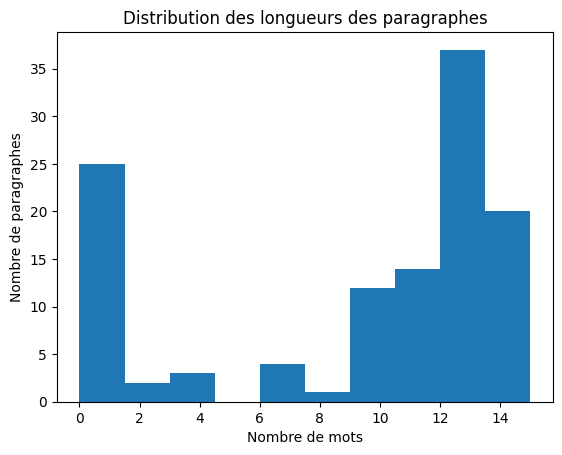

In [32]:
# plot the distribution of paragraph lengths

import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel("Nombre de mots")
plt.ylabel("Nombre de paragraphes")
plt.title("Distribution des longueurs des paragraphes")
plt.show()

# Document export

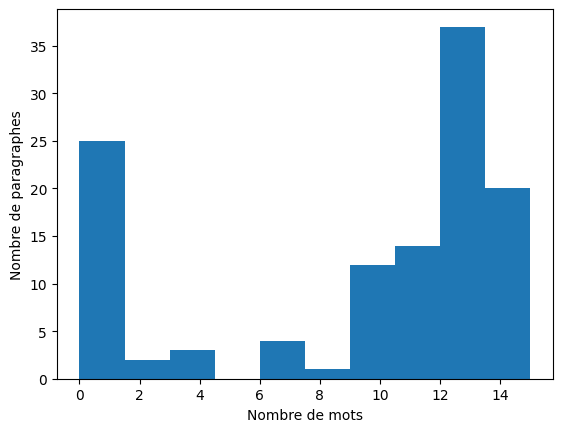

In [38]:
# load the image
from PIL import Image
img = Image.open("./data/miserable.jpg")

# crop and resize the image
img_cropped = img.crop((100, 100, 500, 500))
img_resized = img_cropped.resize((200, 200))

# prepare word document
from docx import Document
doc = Document()
doc.add_heading(title, level=1)
doc.add_picture("./data/miserable.jpg")
doc.add_paragraph(f"Auteur: {author}")
doc.add_paragraph(f"Auteur du rapport: {author}")

# add the graph
import matplotlib.pyplot as plt
import io
from docx.shared import Inches

# plot the distribution of paragraph lengths
plt.hist(lengths)
plt.xlabel("Nombre de mots")
plt.ylabel("Nombre de paragraphes")

# save the plot to a BytesIO object
buf = io.BytesIO()
plt.savefig(buf, format="png")
buf.seek(0)

# add the plot to the word document
doc.add_picture(buf, width=Inches(4))

# save the document
doc.save("./data/miserable.docx")